# Computer Assignment 0


## part 1

First we import pandas library then read given .csv file and store it into a dataframe.



In [1]:
import pandas as pd
bankData = pd.read_csv('bank_term_deposit.csv')


DataFrame.head(n): returns first n rows of dataframe.
    

In [2]:
print('running head(n):')
display(bankData.head(5))

running head(n):


,age,job,marital,education,balance,housing,loan,duration,campaign,pdays,poutcome,y
0,30.0,unemployed,married,primary,1787.0,no,no,79.0,1,-1,unknown,no
1,33.0,services,married,secondary,4789.0,yes,yes,NaN,1,339,failure,no
2,NaN,management,single,tertiary,135.0,yes,no,185.0,1,330,failure,no
3,30.0,management,married,tertiary,1476.0,yes,yes,199.0,4,-1,unknown,no
4,59.0,blue-collar,married,secondary,NaN,yes,no,226.0,1,-1,unknown,no



DataFrame.tail(n): returns last n rows of dataframe.
    

In [3]:
print('running tail(n):')
display(bankData.tail(5))

running tail(n):


,age,job,marital,education,balance,housing,loan,duration,campaign,pdays,poutcome,y
4516,33.0,services,married,secondary,-333.0,yes,no,329.0,5,-1,unknown,no
4517,57.0,self-employed,married,tertiary,-3313.0,yes,yes,153.0,1,-1,unknown,no
4518,57.0,technician,married,secondary,295.0,no,no,151.0,11,-1,unknown,no
4519,28.0,blue-collar,married,secondary,1137.0,no,no,129.0,4,211,other,no
4520,44.0,entrepreneur,single,tertiary,1136.0,yes,yes,345.0,2,249,other,no



DataFrame.describe(): generates descriptive statistics of each column of dataframe based on its data type. to describe all columns of dataframe regardless of data type, we should pass include='all' as argument of function.


In [4]:
print('running describe():')
display(bankData.describe(include='all'))

running describe():


,age,job,marital,education,balance,housing,loan,duration,campaign,pdays,poutcome,y
count,3984.000000,4521,4401,4521,4164.000000,4302,4521,4388.000000,4521.000000,4521.000000,4521,4087
unique,NaN,12,3,4,NaN,2,2,NaN,NaN,NaN,4,2
top,NaN,management,married,secondary,NaN,yes,no,NaN,NaN,NaN,unknown,no
freq,NaN,969,2728,2306,NaN,2435,3830,NaN,NaN,NaN,3705,3623
mean,41.617470,NaN,NaN,NaN,1136.750240,NaN,NaN,264.724020,2.793630,39.766645,NaN,NaN
std,10.696378,NaN,NaN,NaN,2726.204918,NaN,NaN,261.057119,3.109807,100.121124,NaN,NaN
min,19.000000,NaN,NaN,NaN,-3313.000000,NaN,NaN,4.000000,1.000000,-1.000000,NaN,NaN
25%,32.000000,NaN,NaN,NaN,58.000000,NaN,NaN,104.000000,1.000000,-1.000000,NaN,NaN
50%,40.000000,NaN,NaN,NaN,316.000000,NaN,NaN,185.500000,2.000000,-1.000000,NaN,NaN
75%,49.000000,NaN,NaN,NaN,997.000000,NaN,NaN,331.000000,3.000000,-1.000000,NaN,NaN



DataFrame.info(): prints concise summary of a dataframe including the index, data types, columns, non-null values and memory usage.


In [5]:
print(bankData.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        3984 non-null   float64
 1   job        4521 non-null   object 
 2   marital    4401 non-null   object 
 3   education  4521 non-null   object 
 4   balance    4164 non-null   float64
 5   housing    4302 non-null   object 
 6   loan       4521 non-null   object 
 7   duration   4388 non-null   float64
 8   campaign   4521 non-null   int64  
 9   pdays      4521 non-null   int64  
 10  poutcome   4521 non-null   object 
 11  y          4087 non-null   object 
dtypes: float64(3), int64(2), object(7)
memory usage: 424.0+ KB
None


## part 2

As we saw in part1, marital dtype is object and it has categorical values. So we convert marital column to a category using DataFrame.astype() and then use these category values for label encoding.
Now we can see that marital dtype is int8 and each category maped to a number in [0, 2].


In [6]:
tempDf = bankData.copy()
tempDf['marital'] = tempDf['marital'].astype('category').cat.codes
print(tempDf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        3984 non-null   float64
 1   job        4521 non-null   object 
 2   marital    4521 non-null   int8   
 3   education  4521 non-null   object 
 4   balance    4164 non-null   float64
 5   housing    4302 non-null   object 
 6   loan       4521 non-null   object 
 7   duration   4388 non-null   float64
 8   campaign   4521 non-null   int64  
 9   pdays      4521 non-null   int64  
 10  poutcome   4521 non-null   object 
 11  y          4087 non-null   object 
dtypes: float64(3), int64(2), int8(1), object(6)
memory usage: 393.1+ KB
None


## part 3

To find count of Nan values for each column, we shoud subtract count of non-null values of each column from total count of indexes in dataframe.
for numeric column we use mean() and for categorical columns we use mode() to fill Nan values.

Advantages : Easy to implement - Mean and variance will not change.

Disadvantages : Results may not be accurate - For large amount of NaN data this method can increase mod value significantly and cause error in results.


In [7]:
# prints count of Null values of each column.

print(len(bankData.index) - bankData.count())

age          537
job            0
marital      120
education      0
balance      357
housing      219
loan           0
duration     133
campaign       0
pdays          0
poutcome       0
y            434
dtype: int64


In [8]:
bankData['age'].fillna(value=bankData['age'].mean(), inplace=True)
bankData['balance'].fillna(value=bankData['balance'].mean(), inplace=True)
bankData['duration'].fillna(value=bankData['duration'].mean(), inplace=True)
bankData['marital'].fillna(value=bankData['marital'].mode().iat[0] , inplace=True)
bankData['housing'].fillna(value=bankData['housing'].mode().iat[0] , inplace=True)
print(len(bankData.index) - bankData.count())

age            0
job            0
marital        0
education      0
balance        0
housing        0
loan           0
duration       0
campaign       0
pdays          0
poutcome       0
y            434
dtype: int64


In [9]:
# extracting rows from dataframe which their purpose column(y) is Nan.
predDf = bankData[bankData['y'].isna()]
df = bankData.dropna(subset=['y'])
display(df)
display(predDf)

,age,job,marital,education,balance,housing,loan,duration,campaign,pdays,poutcome,y
0,30.00000,unemployed,married,primary,1787.00000,no,no,79.00000,1,-1,unknown,no
1,33.00000,services,married,secondary,4789.00000,yes,yes,264.72402,1,339,failure,no
2,41.61747,management,single,tertiary,135.00000,yes,no,185.00000,1,330,failure,no
3,30.00000,management,married,tertiary,1476.00000,yes,yes,199.00000,4,-1,unknown,no
4,59.00000,blue-collar,married,secondary,1136.75024,yes,no,226.00000,1,-1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33.00000,services,married,secondary,-333.00000,yes,no,329.00000,5,-1,unknown,no
4517,57.00000,self-employed,married,tertiary,-3313.00000,yes,yes,153.00000,1,-1,unknown,no
4518,57.00000,technician,married,secondary,295.00000,no,no,151.00000,11,-1,unknown,no
4519,28.00000,blue-collar,married,secondary,1137.00000,no,no,129.00000,4,211,other,no


,age,job,marital,education,balance,housing,loan,duration,campaign,pdays,poutcome,y
34,49.00000,technician,married,tertiary,1235.0,no,no,354.00000,3,-1,unknown,NaN
38,33.00000,management,married,secondary,3935.0,yes,no,765.00000,1,342,failure,NaN
54,41.61747,blue-collar,married,secondary,2231.0,yes,no,272.00000,3,-1,unknown,NaN
65,51.00000,blue-collar,divorced,secondary,23.0,yes,no,134.00000,1,170,failure,NaN
89,41.61747,blue-collar,married,secondary,1831.0,yes,no,203.00000,2,-1,unknown,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
4470,31.00000,technician,single,tertiary,1166.0,yes,no,207.00000,1,-1,unknown,NaN
4471,59.00000,management,married,unknown,3534.0,no,no,216.00000,4,-1,unknown,NaN
4473,33.00000,technician,married,secondary,479.0,yes,no,137.00000,1,272,failure,NaN
4477,32.00000,management,single,tertiary,577.0,no,no,101.00000,2,-1,unknown,NaN


## part 4



In [10]:
print(f"Customers who have home loan: {df[df['housing'] == 'yes'].shape[0]}")
print(f"Customers who don't have home loan: {df[df['housing'] == 'no'].shape[0]}")
print(f"Customers who have registered term deposit: {df[df['y'] == 'yes'].shape[0]}")
print(f"Customers who don't have registered term deposit: {df[df['y'] == 'no'].shape[0]}")

Customers who have home loan: 2389
Customers who don't have home loan: 1698
Customers who have registered term deposit: 464
Customers who don't have registered term deposit: 3623


## part 5


In [11]:
d1 = df[(df['age'] > 35) & (df['marital'] == 'single') & (df['poutcome'] == 'success')]
display(d1)
print(f"count of extracted rows: {len(d1.index)}")

,age,job,marital,education,balance,housing,loan,duration,campaign,pdays,poutcome,y
200,41.61747,technician,single,tertiary,992.00000,yes,no,301.00000,1,88,success,no
233,45.00000,blue-collar,single,secondary,1136.75024,yes,no,768.00000,2,91,success,no
397,37.00000,technician,single,tertiary,611.00000,no,no,60.00000,5,87,success,no
540,47.00000,admin.,single,secondary,3696.00000,no,no,250.00000,2,181,success,yes
1173,41.61747,technician,single,secondary,2729.00000,yes,no,945.00000,1,139,success,no
2188,46.00000,admin.,single,secondary,1693.00000,yes,no,137.00000,1,97,success,no
2372,43.00000,services,single,secondary,343.00000,yes,no,264.72402,2,97,success,yes
2917,41.00000,technician,single,tertiary,1646.00000,yes,no,261.00000,1,184,success,yes
3385,38.00000,unknown,single,tertiary,1136.75024,no,no,260.00000,3,95,success,yes
3593,42.00000,blue-collar,single,primary,1628.00000,yes,no,119.00000,1,195,success,no


count of extracted rows: 14


## part 6

First we group dataframe by education categories(primary, secondary, tertiary, unknown) then select balance column.So at the end we get the mean of secondary group.


In [12]:
import time
start = time.time()
print(f"mean: {df.groupby('education')['balance'].get_group('secondary').mean()}")
print(f"Executed in {time.time() - start} seconds")

mean: 950.701723798089
Executed in 0.004398345947265625 seconds


## part 7

As we can see, using loop will take longer time to execute.

In [13]:
start = time.time()
total_balance = 0
n_customers = 0
for index, row in df.iterrows():
    if row['education'] == 'secondary':
        n_customers += 1
        total_balance += row['balance']
print(f"mean: {total_balance / n_customers}")
print(f"Executed in {time.time() - start} seconds")

mean: 950.7017237980879
Executed in 0.30193424224853516 seconds


## part 8


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'balance'}>],
       [<AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'campaign'}>],
       [<AxesSubplot:title={'center':'pdays'}>, <AxesSubplot:>]],
      dtype=object)

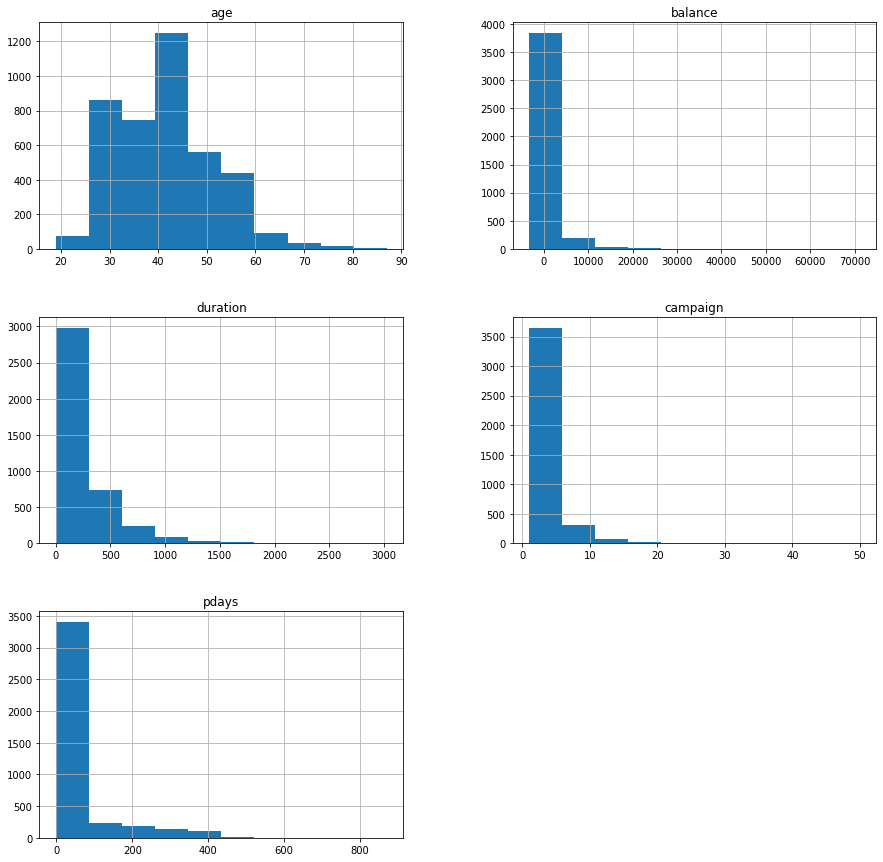

In [14]:
df.hist(column=df.columns.values.tolist(), figsize=(15, 15))

## part 9

First we extract numeric columns into a new dataframe then work with this new dataframe.
After normalization, we can see that x-axis range differs for each histogram of the previous part and it's observable that the ranges strictly have decreased.we normalize the data to bring all the variables to the same range to increase our data analysis accuracy.

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'balance'}>],
       [<AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'campaign'}>],
       [<AxesSubplot:title={'center':'pdays'}>, <AxesSubplot:>]],
      dtype=object)

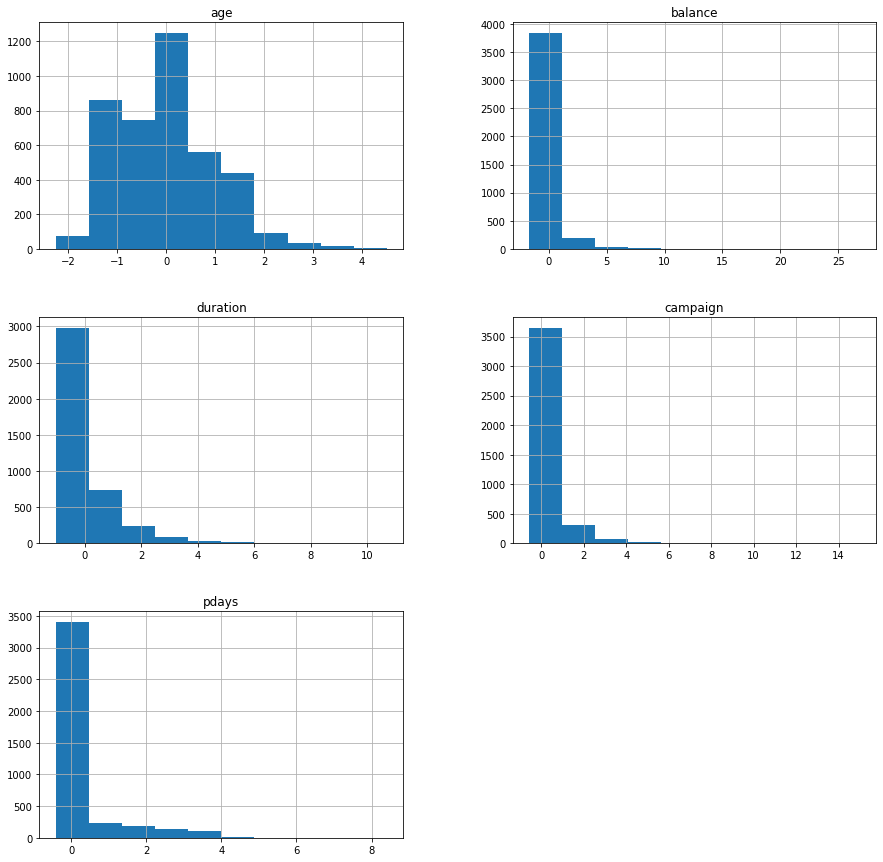

In [15]:
numeric_df = df._get_numeric_data()
normalized_df = (numeric_df - numeric_df.mean()) / numeric_df.std()
normalized_df.hist(column=normalized_df.columns.values.tolist(), figsize=(15, 15))

## part 10


In fact, we are doing classification on data to know which customer has a term deposit and which one doesn't. So we should choose a column that properly classifies data. As we can observe from the below plots, duration is the best choice because the two curves have an appropriate difference. Therefore, the customer has a term deposit if its duration is less than the intersection of two curves, otherwise, he has a term deposit.


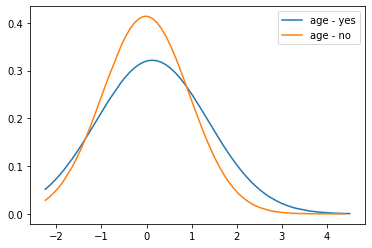

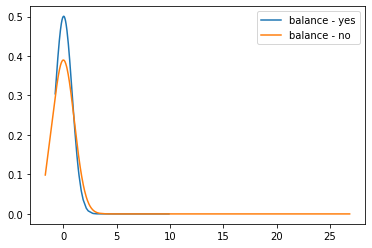

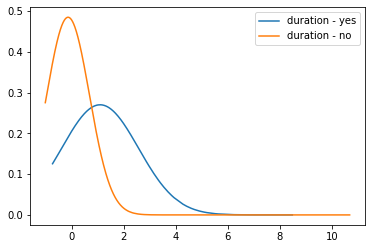

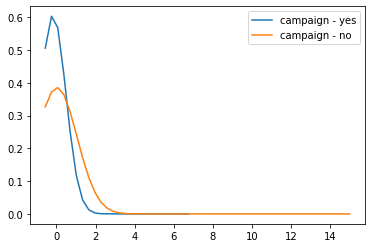

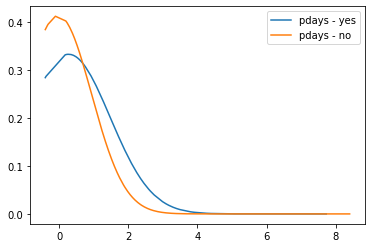

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm


hasY = df[df['y'] == 'yes']._get_numeric_data()
hasY = (hasY - df._get_numeric_data().mean()) / df._get_numeric_data().std()

notY = df[df['y'] == 'no']._get_numeric_data()
notY = (notY - df._get_numeric_data().mean()) / df._get_numeric_data().std()

mean1, std1 = hasY.mean(), hasY.std()
mean2, std2 = notY.mean(), notY.std()

for col in hasY.columns:
    plt.plot(hasY[col].sort_values(), norm(mean1[col], std1[col]).pdf(hasY[col].sort_values()), label=col+' - yes')
    plt.plot(notY[col].sort_values(), norm(mean2[col], std2[col]).pdf(notY[col].sort_values()), label=col+' - no')
    plt.legend()
    plt.show()
    

## part 11

Intersection point in duration plot is 0.84.


In [17]:
normPredDf=(predDf['duration']-predDf['duration'].mean())/predDf['duration'].std()
normPredDf=normPredDf.apply(lambda x:'yes' if x>0.84 else 'no')
display(normPredDf)
predDf['y']=normPredDf
display(predDf)
predDf.to_csv('predictedData.csv')

34       no
38      yes
54       no
65       no
89       no
       ... 
4470     no
4471     no
4473     no
4477     no
4482     no
Name: duration, Length: 434, dtype: object

/home/morteza/.local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,age,job,marital,education,balance,housing,loan,duration,campaign,pdays,poutcome,y
34,49.00000,technician,married,tertiary,1235.0,no,no,354.00000,3,-1,unknown,no
38,33.00000,management,married,secondary,3935.0,yes,no,765.00000,1,342,failure,yes
54,41.61747,blue-collar,married,secondary,2231.0,yes,no,272.00000,3,-1,unknown,no
65,51.00000,blue-collar,divorced,secondary,23.0,yes,no,134.00000,1,170,failure,no
89,41.61747,blue-collar,married,secondary,1831.0,yes,no,203.00000,2,-1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...
4470,31.00000,technician,single,tertiary,1166.0,yes,no,207.00000,1,-1,unknown,no
4471,59.00000,management,married,unknown,3534.0,no,no,216.00000,4,-1,unknown,no
4473,33.00000,technician,married,secondary,479.0,yes,no,137.00000,1,272,failure,no
4477,32.00000,management,single,tertiary,577.0,no,no,101.00000,2,-1,unknown,no
